In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.16.2
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
%pip install numpy pandas matplotlib seaborn scikit-learn jupyter opencv-python pillow


Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt

In [4]:
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [6]:
import seaborn as sns


In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


2025-06-27 20:39:22.124554: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-06-27 20:39:22.124584: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-06-27 20:39:22.124587: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-06-27 20:39:22.124614: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-27 20:39:22.124629: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [9]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [10]:
#BUILDING MODEL

In [11]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()

In [13]:
#BUILDING CONVOLUTION LAYER

In [14]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/Users/dhruvmishra/tf-m1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Dropout(0.25))  # To avoid overfitting

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(units=1500,activation='relu'))

In [22]:
model.add(Dropout(0.4))  #To avoid overfitting

In [23]:
#OUTPUT LAYER
model.add(Dense(units=38,activation='softmax'))

In [24]:
#COMPILING MODEL

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#TRAINING MODEL

In [28]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2025-06-27 20:40:49.835471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 502s 227ms/step - accuracy: 0.3730 - loss: 2.2532 - val_accuracy: 0.8419 - val_loss: 0.5070
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 566s 258ms/step - accuracy: 0.8020 - loss: 0.6615 - val_accuracy: 0.8941 - val_loss: 0.3390
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 704s 320ms/step - accuracy: 0.8745 - loss: 0.4235 - val_accuracy: 0.9062 - val_loss: 0.3356
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 814s 371ms/step - accuracy: 0.9088 - loss: 0.3077 - val_accuracy: 0.9252 - val_loss: 0.2788
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 779s 355ms/step - accuracy: 0.9240 - loss: 0.2632 - val_accuracy: 0.9455 - val_loss: 0.1836
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 986s 449ms/step - accuracy: 0.9400 - loss: 0.2119 - val_accuracy: 0.9442 - val_loss: 0.2158
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 688s 313ms/step - accuracy: 0.9480 - loss: 0.1862 - val_accuracy: 0.9408 - val_loss: 0.2650
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 673s 306ms/step - accuracy: 0.9

In [30]:
train_loss,train_acc =model.evaluate(training_set) 

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 89s 40ms/step - accuracy: 0.9798 - loss: 0.0722


In [31]:
print(train_loss,train_acc)

0.06652920693159103 0.9816487431526184


In [32]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9548 - loss: 0.2051


In [33]:
##SAVING MODEL

In [34]:
model.save('trained_model.h5')

In [35]:
model.save('trained_model.keras')

In [36]:
training_history.history

{'accuracy': [0.5649334788322449,
  0.8240131139755249,
  0.882651686668396,
  0.9100931882858276,
  0.9283732771873474,
  0.9405363202095032,
  0.9497403502464294,
  0.9567821621894836,
  0.9626289010047913,
  0.9674230217933655],
 'loss': [1.5029644966125488,
  0.5898202657699585,
  0.39489808678627014,
  0.3028441071510315,
  0.24770806729793549,
  0.21027950942516327,
  0.1776251196861267,
  0.15907767415046692,
  0.13963791728019714,
  0.1233808621764183],
 'val_accuracy': [0.8418506979942322,
  0.8941497802734375,
  0.9061574935913086,
  0.9252219200134277,
  0.945538341999054,
  0.9442294836044312,
  0.9407580494880676,
  0.95083087682724,
  0.948668360710144,
  0.9545868635177612],
 'val_loss': [0.5070435404777527,
  0.3390393853187561,
  0.3356458246707916,
  0.27878373861312866,
  0.18355195224285126,
  0.21582171320915222,
  0.2650485634803772,
  0.19763672351837158,
  0.21298177540302277,
  0.20785944163799286]}

In [37]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [38]:
##ACCURACY VISUALISATION

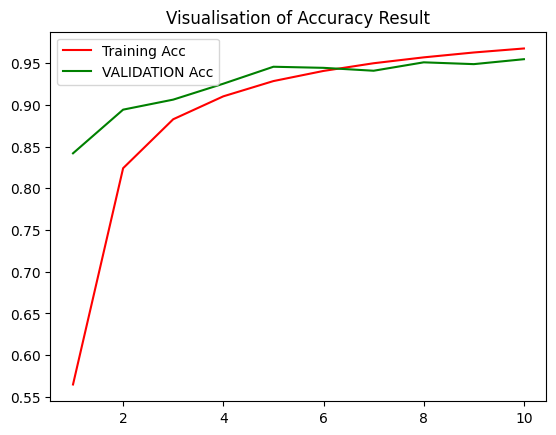

In [49]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Acc')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='VALIDATION Acc')
plt.title("Visualisation of Accuracy Result")
plt.legend()
plt.show()

In [50]:
# Some other metrics for model evaluation

In [51]:
class_name=validation_set.class_names

In [52]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [53]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [54]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step


(array([[1.00000000e+00, 2.52534643e-11, 1.90758368e-12, ...,
         1.02275584e-19, 1.14162339e-20, 5.85092905e-17],
        [1.00000000e+00, 2.63401581e-15, 1.13571025e-15, ...,
         9.21533628e-26, 7.95565693e-22, 4.34962303e-22],
        [1.00000000e+00, 3.67361948e-16, 5.93695896e-14, ...,
         4.95943861e-28, 2.43940913e-19, 7.49669288e-14],
        ...,
        [2.50383022e-19, 4.46262131e-20, 3.15198273e-14, ...,
         1.16742688e-19, 6.20793749e-22, 1.00000000e+00],
        [2.12670253e-17, 1.02552179e-19, 8.38175720e-13, ...,
         1.27055246e-16, 1.18322668e-19, 1.00000000e+00],
        [4.39047875e-19, 1.01327421e-19, 9.39990264e-19, ...,
         1.93708990e-17, 4.77311224e-13, 9.99982595e-01]], dtype=float32),
 (17572, 38))

In [55]:
predicted_categories = tf.argmax(y_pred,axis=1)


In [56]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [57]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

2025-06-28 00:31:57.505283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [58]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.90      1.00      0.95       440
                                   Apple___healthy       0.94      0.94      0.94       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.96      0.97       421
                 Cherry_(including_sour)___healthy       0.92      0.99      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.91      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.96      0.

In [61]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[469,   5,   1, ...,   0,   0,   1],
       [  0, 481,   2, ...,   0,   0,   0],
       [  0,   0, 439, ...,   0,   0,   0],
       ...,
       [  0,   0,   2, ..., 488,   0,   0],
       [  0,   0,   1, ...,   0, 438,   0],
       [  0,   0,   3, ...,   0,   0, 413]])

In [64]:
##Visualising Confusion Matrix # x label is PREDICTED CLASS and y label is ACTUAL CLASS

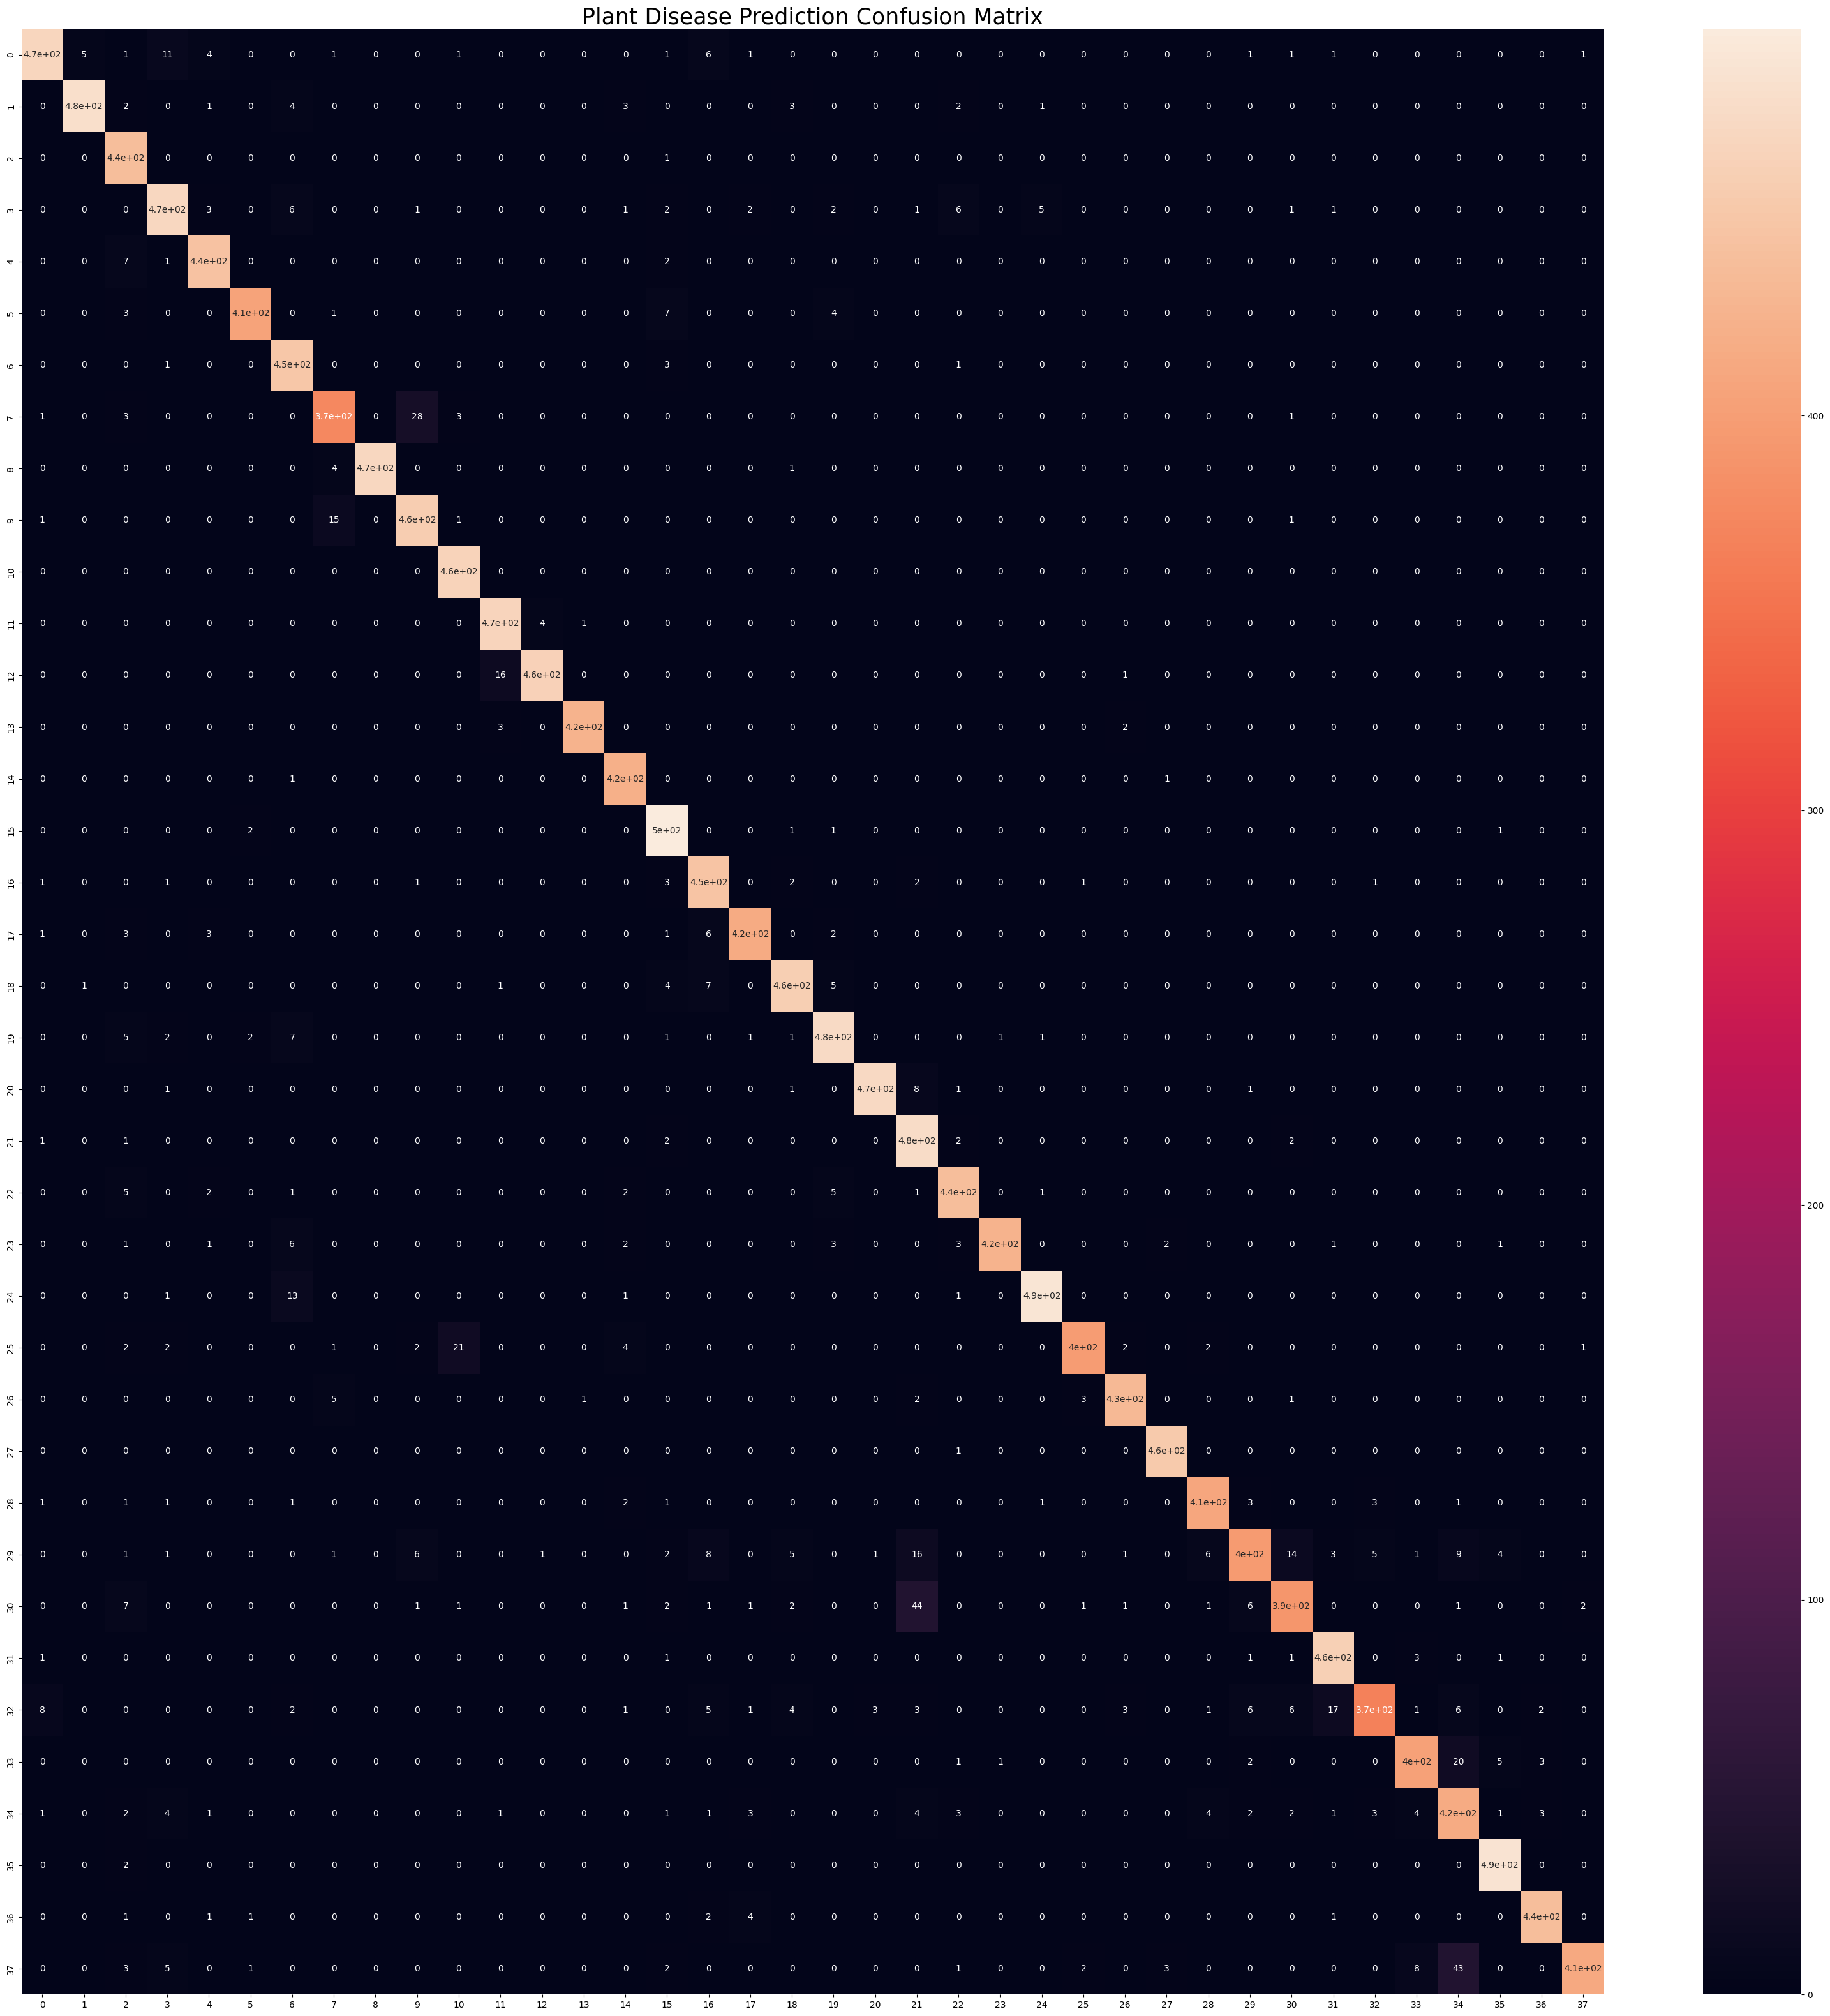

In [65]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
# plt.xlabel("Predicted Class",fontsize=20)
# plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()